--------------------------
### Exercise 3 - Sampling from Continuous Distributions

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
from scipy import stats

### 1. Generate simulated values from the following distributions

- (a) Exponential distribution

- (b) Normal distribution (at least with standard Box-Mueller)
- (c) Pareto distribution, with β = 1 and experiment with different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4. 

Verify the results by comparing histograms with analytical results and perform tests for distribution type.

Code for simulating samples from distributions

In [147]:
# Exponential distribution

def exponential(l, U):
    return [-log(i)/l for i in U]

# Pareto 

def pareto(k, beta, U):
    return [beta*(i**(-1/k)) for i in U]

# Normal - Box Mueller

def box_muller(U1, U2):
    return np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2), np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

def pareto_hist_comparison(gen_sample, k):
    pareto_reference = np.random.pareto(k, size=10000)
    plt.hist(gen_sample, alpha=0.5, label="generated", bins=20)
    plt.hist(pareto_reference, alpha=0.3, label="reference",bins=20)
    plt.title(f"k = {k}")
    plt.legend()
    plt.show()

Generating samples and making comparisons

In [148]:

def ex1():

    # a) Exponential

    print("----- Exponential -----")

    U = np.random.uniform(size=10000)
    l = 4
    exp_dist = exponential(l, U)
    plt.scatter(U, exp_dist, marker="x", color="r", label=f"Simulated: \u03BB = {l}", alpha=0.2)
    plt.grid()
    plt.xlabel(r"$U_i$")
    plt.ylabel(r"$X_i$")
    plt.legend()
    plt.title("Generated Exponential Distribution")
    plt.show()

    
    kres = stats.kstest(exp_dist, stats.expon.cdf(np.linspace(0,1,10000), scale=1/l))

    print(f"Kolmogorov-Smirnov test:\n\t- Test statistic: {kres.statistic}\n\t- P-value: {kres.pvalue}")


    print("Histograms:")


    plt.hist(stats.expon.rvs(size=10000, scale=1/l),bins=10, alpha=0.5, label="Reference (random sample)")
    plt.hist(exp_dist,bins=10, alpha=0.5, label="Generated")
    plt.legend()
    plt.title("Exponential Distribution Histograms")
    plt.grid()
    plt.show()
    
    
    # b) Normal

    print("----- Normal -----")

    U1, U2 = np.random.uniform(size=10000), np.random.uniform(size=10000)

    N1, N2 = box_muller(U1, U2)

    plt.scatter(N1, N2, marker="x", color="g", alpha=0.5)
    plt.grid()
    plt.title(r"$N(0,1)$")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.show()
    
    kres_x = stats.kstest(N1, stats.norm.cdf)

    print(f"Kolmogorov-Smirnov test (x):\n\t- Test statistic: {kres_x.statistic}\n\t- P-value: {kres_x.pvalue}")
    
    kres_y = stats.kstest(N2, stats.norm.cdf)

    print(f"Kolmogorov-Smirnov test (y):\n\t- Test statistic: {kres_y.statistic}\n\t- P-value: {kres_y.pvalue}")



    plt.hist(N1, 10, alpha=0.5, label=r"$N_1$")
    plt.hist(N2, alpha=0.5, label=r"$N_2$")
    plt.hist(np.random.normal(0, 1, 10000), alpha =0.5, label="reference")
    plt.title("Normal Distribution Histograms")
    plt.legend()
    plt.show()

    # c) Pareto
    print("----- Pareto -----")
    U = np.random.random(size=10000)
    beta = 1


    # i) k = 2.05
    

    p1 = pareto(2.05, beta, U)
    kres_1 = stats.kstest(p1, np.random.pareto(2.05, size=10000))
    print("k = 2.05")
    print(f"Kolmogorov-Smirnov test:\n\t- Test statistic: {kres_1.statistic}\n\t- P-value: {kres_1.pvalue}")


    # ii) k = 2.5
    
    p2 = pareto(2.5, beta, U)
    kres_2 = stats.kstest(p2, np.random.pareto(2.5, size=10000))
    print("k = 2.5")
    print(f"Kolmogorov-Smirnov test:\n\t- Test statistic: {kres_2.statistic}\n\t- P-value: {kres_2.pvalue}")

    # iii) k = 3
    
    p3 = pareto(3, beta, U)
    kres_3 = stats.kstest(p2, np.random.pareto(3, size=10000))
    print("k = 3")
    print(f"Kolmogorov-Smirnov test:\n\t- Test statistic: {kres_3.statistic}\n\t- P-value: {kres_3.pvalue}")

    # iv) k = 4
    
    p4 = pareto(4, beta, U)
    kres_4 = stats.kstest(p2, np.random.pareto(4, size=10000))
    print("k = 4")
    print(f"Kolmogorov-Smirnov test:\n\t- Test statistic: {kres_4.statistic}\n\t- P-value: {kres_4.pvalue}")

    plt.scatter(U, p1, label="k = 2.05",marker="x", alpha=0.5)
    plt.scatter(U, p2, label="k = 2.5",marker="x", alpha=0.5)
    plt.scatter(U, p3, label="k = 3",marker="x", alpha=0.5)
    plt.scatter(U, p4, label="k = 4",marker="x", alpha=0.5)
    plt.title("Pareto")
    plt.legend()
    plt.show()




    print("Histograms for Pareto")
    for sample, k in zip([p1,p2,p3,p4],[2.05, 2.5, 3, 4]):
        print(f"K: {k}")
        pareto_hist_comparison(sample, k)

----- Exponential -----


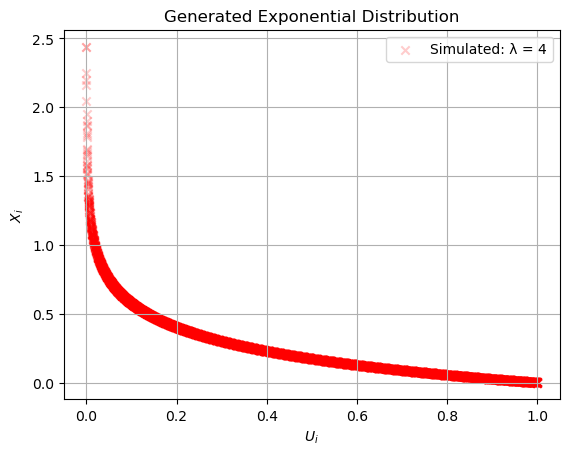

Kolmogorov-Smirnov test:
	- Test statistic: 0.6895
	- P-value: 0.0
Histograms:


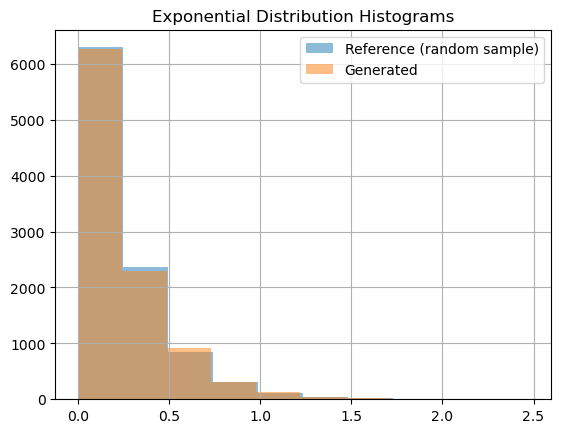

----- Normal -----


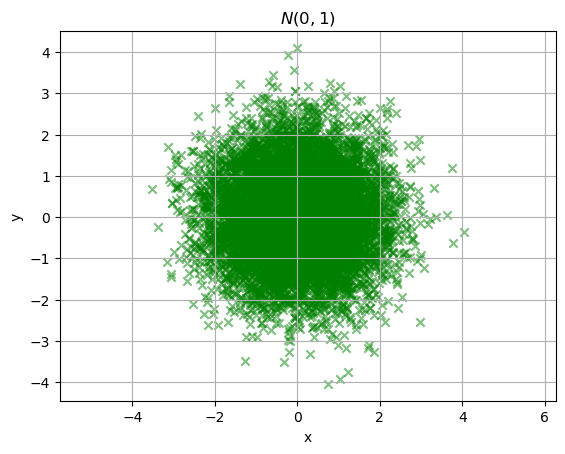

Kolmogorov-Smirnov test (x):
	- Test statistic: 0.005400462827076402
	- P-value: 0.9309061907677927
Kolmogorov-Smirnov test (y):
	- Test statistic: 0.009380223859185133
	- P-value: 0.34031453703502434


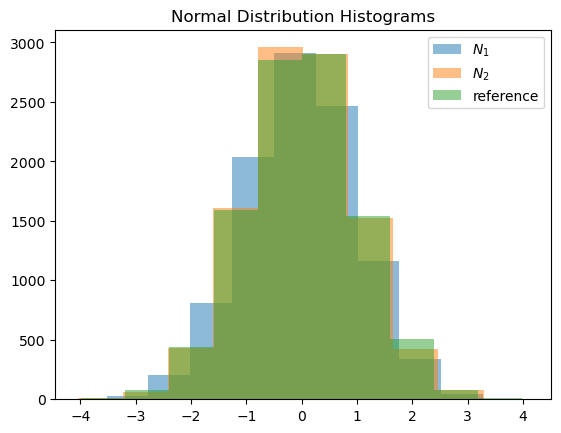

----- Pareto -----
k = 2.05
Kolmogorov-Smirnov test:
	- Test statistic: 0.7553
	- P-value: 0.0
k = 2.5
Kolmogorov-Smirnov test:
	- Test statistic: 0.817
	- P-value: 0.0
k = 3
Kolmogorov-Smirnov test:
	- Test statistic: 0.8727
	- P-value: 0.0
k = 4
Kolmogorov-Smirnov test:
	- Test statistic: 0.9341
	- P-value: 0.0


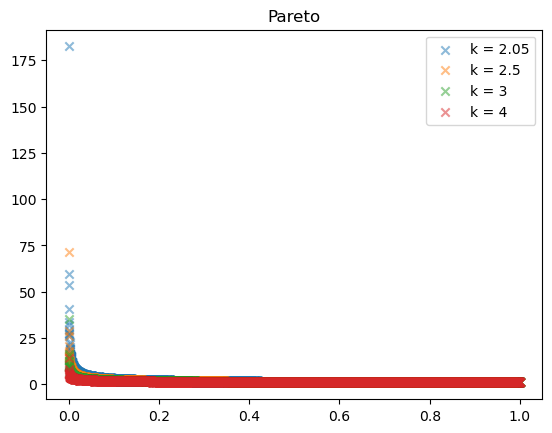

Histograms for Pareto
K: 2.05


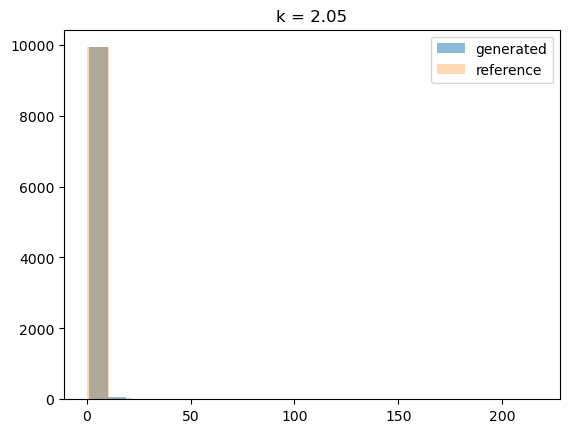

K: 2.5


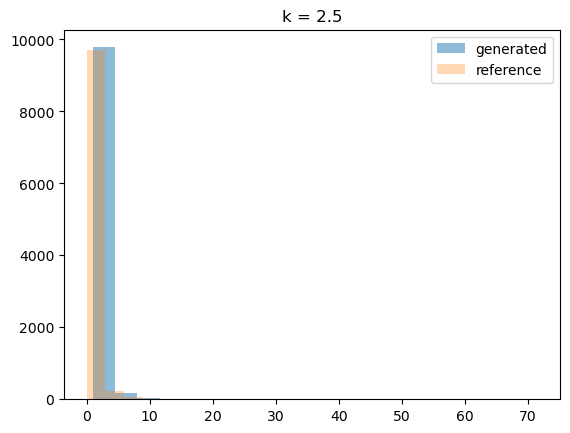

K: 3


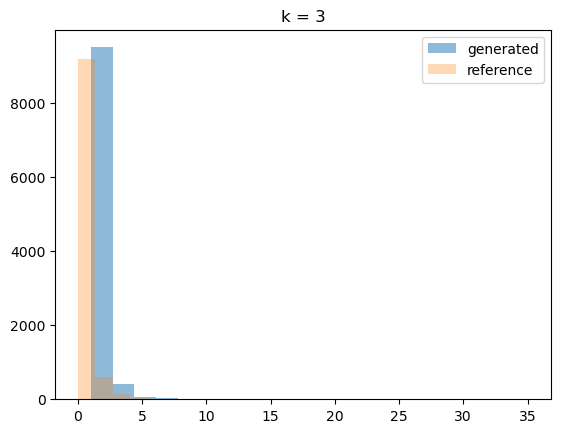

K: 4


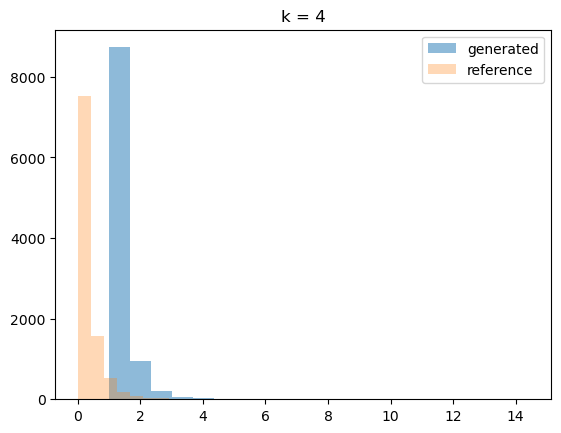

In [149]:
ex1()

**Problem 1 conclusion**

- Exponential:
    - Scatter plot representative of distribution. Density can be seen to increase at lower values, and decrease at higher values.
    - Histogram: Looks very similar to that of reference sample.
    - *Kolmogorov Smirnov* testing: Not behaving as expected. Bug probably present.
- Normal:
    - Scatter plot displays displays unit "circle" as expected
    - Histogram: Looks very similar to that of reference sample.
    - *Kolmogorov Smirnov* testing: Passes test at 5% significance level.
- Pareto:
    - At some value $k > 2.5$ the simulated pareto distribution starts to significantly deviate from the reference.
        - *I.e.,* the simulated sample begins to fail the *Kolmogorov-Smirnov* tests
    - Histograms also begin to significantly deviate from the reference
    - *Kolmogorov Smirnov* testing: As mentioned above, the sample fails at when $k > 2.5$




### 2. Pareto

For the Pareto distribution with support on $[\beta, \infty[$ compare mean value and variance, with analytical results, which can be calculated as $E(X) = \beta \frac{k}{k-1}, \ k > 1$ and $Var(X) = \beta^2 \frac{k}{(k-1)^2 (k-2)}$ Explain problems if any.

In [145]:
def ex2():
    
    U = np.random.uniform(size=10000)
    ks = np.linspace(2.1, 5, 100)
    mean_gen, mean_analytical, var_gen, var_analytical = [], [], [], []

    for k in ks:
        # Simulating values
        p = pareto(k, 1, U)
        
        mean_gen.append(np.mean(p))
        mean_analytical.append(k/(k-1))
        var_gen.append((np.var(p)))
        var_analytical.append(k/(((k-1)**2)*(k-2)))
    
    plt.scatter(ks, mean_gen, label="Simulated", marker="x")
    plt.scatter(ks, mean_analytical, label="Analytical", marker="x")
    plt.title("Comparison between simulated mean and analytical mean")
    plt.xlabel(r"k")
    plt.ylabel(r"E(x)")
    plt.legend()
    plt.show()

    plt.scatter(ks, var_gen, label="Simulated", marker="x")
    plt.scatter(ks, var_analytical, label="Analytical", marker="x")
    plt.title("Comparison between simulated variance and analytical variance")
    plt.xlabel(r"k")
    plt.ylabel(r"Var(x)")
    plt.legend()
    plt.show()

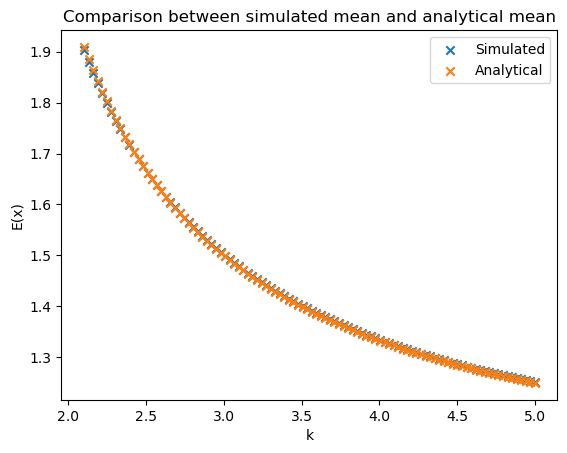

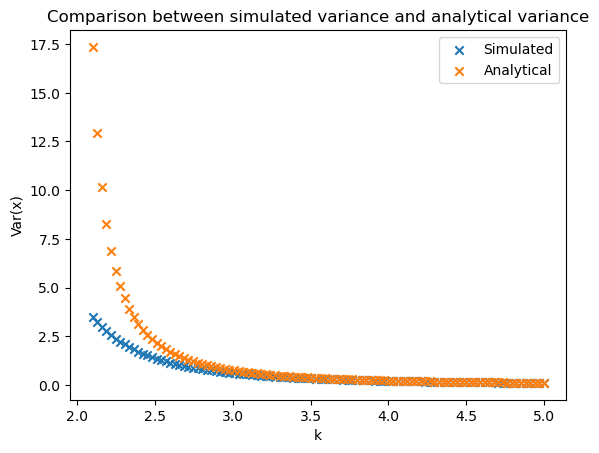

In [146]:
ex2()

**Problem 2 - Conlusion**

- Sample mean and analytical mean are very similar.
- At a  k-value of $k \approx 2.7$ the sample variance intersects with the analytical variance.
    - Potentially related to problem 1 conclusion.


### 3. Confidence Intervals - Mean and Variance

For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.

In [138]:
def CI_mean(sample):
    z = 1.96
    s = np.std(sample)
    n = len(sample)
    return np.mean(sample)-z*(s/np.sqrt(n)), np.mean(sample)+z*(s/np.sqrt(n))

def CI_var(sample):
    n = len(sample)
    chi2_lower = stats.chi2.ppf(0.05/2, n-1)
    chi2_upper = stats.chi2.ppf(1 - 0.05/2, n-1)
    return ((n-1)*np.var(sample)/chi2_upper), ((n-1)*np.var(sample)/chi2_lower)

In [139]:
def ex3():
    
    n = 10
    means, vars = [], []
    CI_means, CI_vars = [], []

    for i in range(n):
        u1,u2 = np.random.uniform(size=10), np.random.uniform(size=10)
        X, _ = box_muller(u1,u2)

        means.append(np.mean(X))
        vars.append(np.var(X))
        

        CI_means.append(CI_mean(X))
        CI_vars.append( CI_var(X))
    
    plt.scatter(list(range(n)), means,label=r"$\bar{x}$",color="r", alpha=0.5, marker="x")
    plt.scatter(list(range(n)), [i[0] for i in CI_means], label="lower", color="g",alpha=0.5)
    plt.scatter(list(range(n)), [i[1] for i in CI_means], label="upper", color="b",alpha=0.5)
    plt.title("Means with 95% confidence intervals")
    plt.legend()
    plt.grid()
    plt.show()

        
    plt.scatter(list(range(n)), vars,label=r"$s^2$",color="r", alpha=0.5, marker="x")
    plt.scatter(list(range(n)), [i[0] for i in CI_vars], label="lower", color="g",alpha=0.5)
    plt.scatter(list(range(n)), [i[1] for i in CI_vars], label="upper", color="b",alpha=0.5)
    plt.title("Variances with 95% confidence intervals")
    plt.legend()
    plt.grid()
    plt.show()
        
        
   

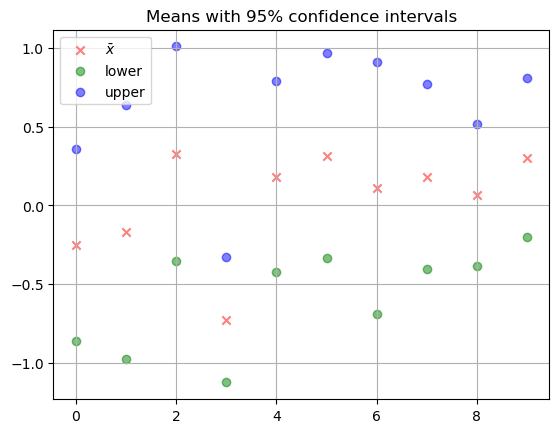

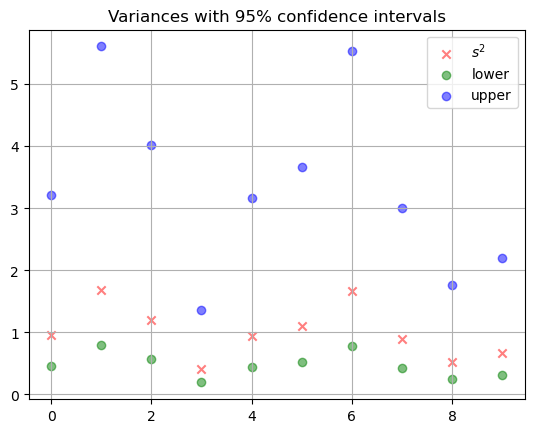

In [140]:
ex3()

**Problem 3 - Discussion of Results**

- Sample means and variances are all within $95\%$ confidence intervals.
- Clear $\chi^2$ distribution for variance and *Normal* distribution for means.


### 4. Simulation of Pareto Distribution using Composition

Method:

1. Select arbitrary mean $\mu$.
2. Generate random sample from exponential distribution with mean $\mu$. Call $Y$.
3. Generate random sample from exponential distribution using values from $Y$ as means.
4. Produce cdf of Pareto distribution: $F(x) = 1 - (1 + \frac{x}{\mu})^{-1}$, where $x \in X$

In [141]:
def ex4():
    mu = 2 # arbitrary mean for exponential distribution
    Y = np.random.exponential(scale=1/mu, size=10000) # Random exponential sample Y
    X = np.random.exponential(scale=1/Y) # Random exponential sampling of X, given Y

    # Creating CDF

    X_sort = sorted(X)
    F_x = 1. * np.arange(len(X)) / (len(X) - 1)


    plt.scatter(X_sort, F_x, marker="x", color="g", label=f"\u03BC={mu}",alpha=0.5)
    plt.title("CDF of Simulated Pareto (composition method)")
    plt.xlabel("x")
    plt.xlim(0,100)
    plt.legend()
    plt.grid()
    plt.ylabel(r"$P(X \leq x)$")
    plt.show()

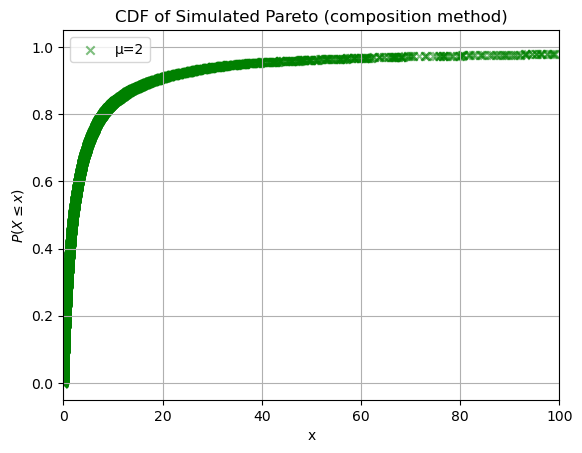

In [142]:
# 4 - Pareto via composition

ex4()

